In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as tsa_plots

from pandas import Grouper
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as smf

In [ ]:
data = pd.read_excel("/content/Airlines+Data.xlsx")
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [ ]:
#EDA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [ ]:
data.isna().sum()

Month         0
Passengers    0
dtype: int64

In [ ]:
data[data.duplicated()].shape

(0, 2)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Passengers,96.0,213.708333,71.918216,104.0,156.0,200.0,264.75,413.0


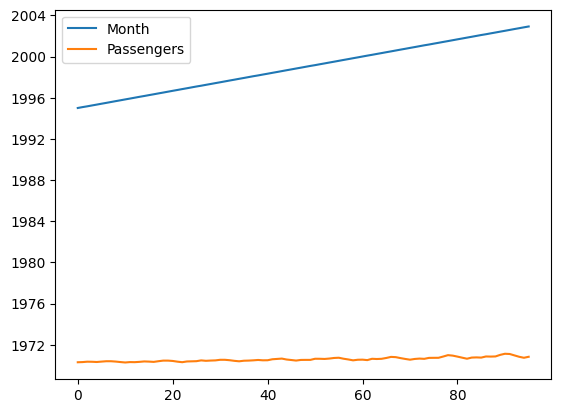

In [ ]:
data.plot()
plt.show()

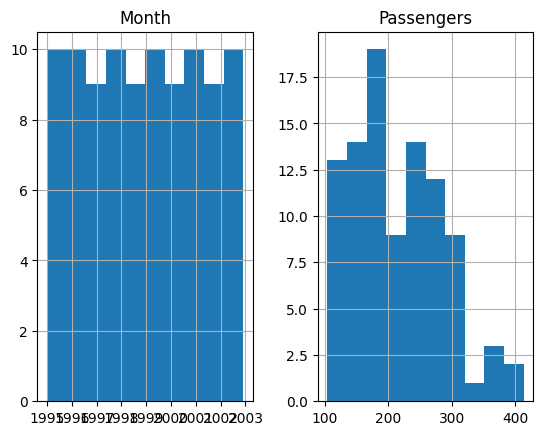

In [ ]:
data.hist()
plt.show()


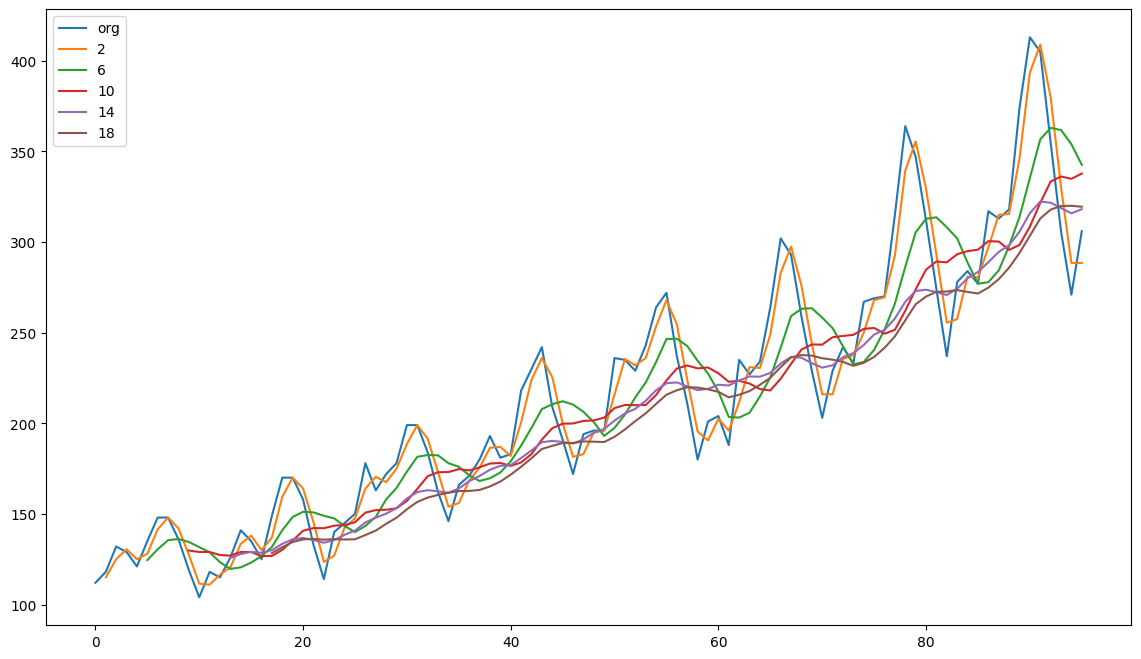

In [ ]:
#Moving Average
plt.figure(figsize=(14, 8))
data.Passengers.plot(label="org")
for i in range(2, 20, 4):
    data["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc="best")

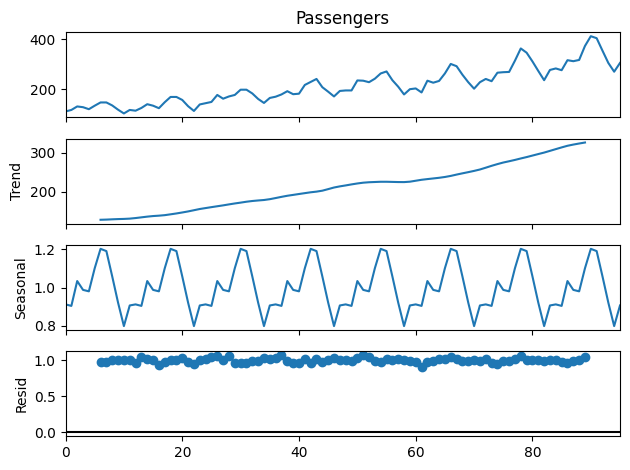

In [ ]:
decompose_ts_add = seasonal_decompose(data.Passengers,period=12, model="multiplicative")
decompose_ts_add.plot()
plt.show()

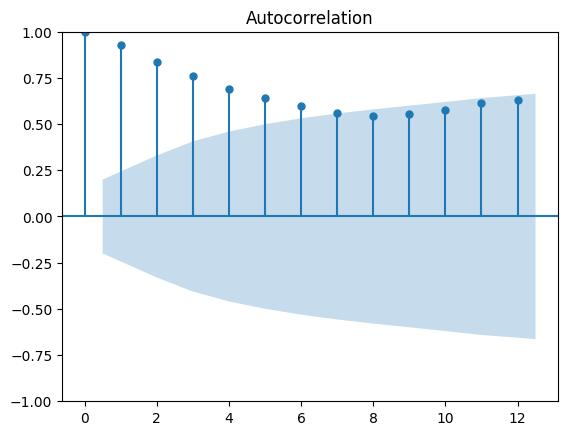

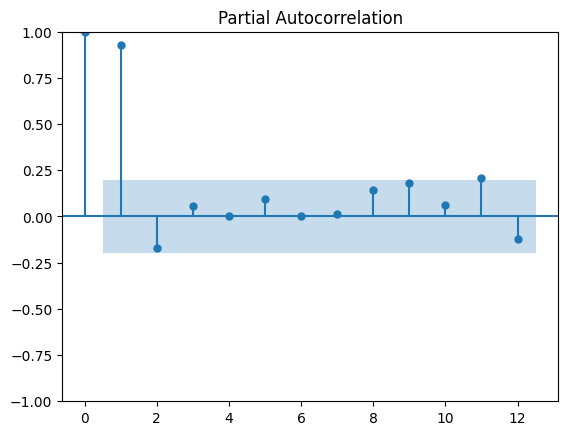

In [ ]:
#ACF plots and PACF plots
tsa_plots.plot_acf(data.Passengers,lags=12)
tsa_plots.plot_pacf(data.Passengers,lags=12)
plt.show()

In [ ]:
#Data Preprocessing
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
p = data["Month"][0]
print.(Month._getitem_)
data['month'] = 0

SyntaxError: ignored

In [ ]:
adfuller_test(series['log_Passengers'])

ADF Test Statistic : -2.331274291992354
p-value : 0.16207965291499626
#Lags Used : 1
Number of Observations Used : 2890
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
#Square Root Transform
series['sqrt_Passengers'] = np.sqrt(series['Passengers'])
series.head()

,Passengers,log_Passengers,sqrt_Passengers
Date,,,
1995-01-01,112.000000,4.718499,10.583005
1995-01-02,112.193548,4.720225,10.592146
1995-01-03,112.387097,4.721949,10.601278
1995-01-04,112.580645,4.723670,10.610403
1995-01-05,112.774194,4.725388,10.619519


In [ ]:
adfuller_test(series['sqrt_Passengers'])

ADF Test Statistic : -2.3513181499762115
p-value : 0.15595030662216458
#Lags Used : 1
Number of Observations Used : 2890
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
#Combination of SQRT and LOG Transform
from numpy import sqrt
from numpy import log

series['comb_Passengers'] = sqrt(log(series['Passengers']))
series.head()

,Passengers,log_Passengers,sqrt_Passengers,comb_Passengers
Date,,,,
1995-01-01,112.000000,4.718499,10.583005,2.172211
1995-01-02,112.193548,4.720225,10.592146,2.172608
1995-01-03,112.387097,4.721949,10.601278,2.173005
1995-01-04,112.580645,4.723670,10.610403,2.173401
1995-01-05,112.774194,4.725388,10.619519,2.173796


In [ ]:
adfuller_test(series['comb_Passengers'])

ADF Test Statistic : -2.3381948587392807
p-value : 0.15994502138572964
#Lags Used : 1
Number of Observations Used : 2890
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
#Differencing
series['Seasonal_Difference']=series['Passengers']-series['Passengers'].shift(12)
series.head(14)

,Passengers,log_Passengers,sqrt_Passengers,comb_Passengers,Seasonal_Difference
Date,,,,,
1995-01-01,112.000000,4.718499,10.583005,2.172211,NaN
1995-01-02,112.193548,4.720225,10.592146,2.172608,NaN
1995-01-03,112.387097,4.721949,10.601278,2.173005,NaN
1995-01-04,112.580645,4.723670,10.610403,2.173401,NaN
1995-01-05,112.774194,4.725388,10.619519,2.173796,NaN
1995-01-06,112.967742,4.727102,10.628628,2.174190,NaN
1995-01-07,113.161290,4.728814,10.637730,2.174584,NaN
1995-01-08,113.354839,4.730523,10.646823,2.174977,NaN
1995-01-09,113.548387,4.732229,10.655909,2.175369,NaN


In [ ]:
adfuller_test(series['Seasonal_Difference'].dropna())

ADF Test Statistic : -6.947033105850709
p-value : 9.911327938339944e-10
#Lags Used : 25
Number of Observations Used : 2854
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
#Combination of SQRT Transform with Differencing
series['sqrt_Passengers_Difference']=series['sqrt_Passengers']-series['sqrt_Passengers'].shift(12)
series.head(14)

,Passengers,log_Passengers,sqrt_Passengers,comb_Passengers,Seasonal_Difference,sqrt_Passengers_Difference
Date,,,,,,
1995-01-01,112.000000,4.718499,10.583005,2.172211,NaN,NaN
1995-01-02,112.193548,4.720225,10.592146,2.172608,NaN,NaN
1995-01-03,112.387097,4.721949,10.601278,2.173005,NaN,NaN
1995-01-04,112.580645,4.723670,10.610403,2.173401,NaN,NaN
1995-01-05,112.774194,4.725388,10.619519,2.173796,NaN,NaN
1995-01-06,112.967742,4.727102,10.628628,2.174190,NaN,NaN
1995-01-07,113.161290,4.728814,10.637730,2.174584,NaN,NaN
1995-01-08,113.354839,4.730523,10.646823,2.174977,NaN,NaN
1995-01-09,113.548387,4.732229,10.655909,2.175369,NaN,NaN


In [ ]:
adfuller_test(series['sqrt_Passengers_Difference'].dropna())

ADF Test Statistic : -6.968986233530479
p-value : 8.763990594767519e-10
#Lags Used : 25
Number of Observations Used : 2854
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


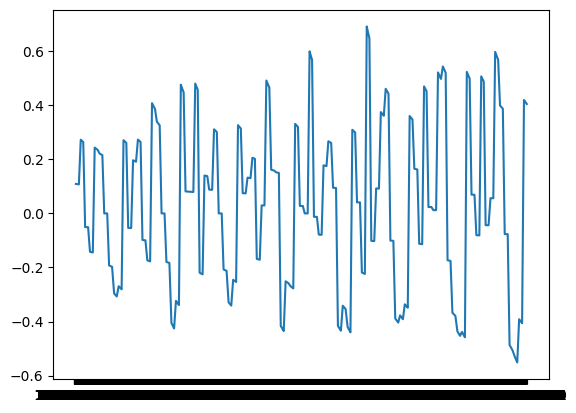

In [ ]:
plt.plot(series['sqrt_Passengers_Difference'])
plt.show()

In [ ]:
#Splitting Data
series1 = read_csv("data2.csv", index_col=0)
split_point = len(series1)-12
dataset, validation = series1[0:split_point], series1[split_point:]
print("dataset %d, validation %d" % (len(dataset), len(validation)))

dataset 2880, validation 12


In [ ]:
dataset.to_csv("dataset.csv", header=False)
validation.to_csv("validation.csv", header=False)

In [ ]:
#Persistence/ Base model
train = read_csv("dataset.csv", header=None, index_col=0, parse_dates=True, squeeze=True)

X = train.values
X = X.astype("float32")
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

<ipython-input-51-ecf953f1fbd4>:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = read_csv("dataset.csv", header=None, index_col=0, parse_dates=True, squeeze=True)


In [ ]:
history = [X for X in train]
predictions = list()

for i in range (len(test)):
    yhat = history[-1]
    predictions.append(yhat)

    obs = test[i]
    history.append(obs)
    print(">Predicted=%.3f, Expected=%.3f" % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print("RMSE: %.3f" % rmse)

>Predicted=194.581, Expected=194.645
>Predicted=194.645, Expected=194.710
>Predicted=194.710, Expected=194.774
>Predicted=194.774, Expected=194.839
>Predicted=194.839, Expected=194.903
>Predicted=194.903, Expected=194.968
>Predicted=194.968, Expected=195.032
>Predicted=195.032, Expected=195.097
>Predicted=195.097, Expected=195.161
>Predicted=195.161, Expected=195.226
>Predicted=195.226, Expected=195.290
>Predicted=195.290, Expected=195.355
>Predicted=195.355, Expected=195.419
>Predicted=195.419, Expected=195.484
>Predicted=195.484, Expected=195.548
>Predicted=195.548, Expected=195.613
>Predicted=195.613, Expected=195.677
>Predicted=195.677, Expected=195.742
>Predicted=195.742, Expected=195.806
>Predicted=195.806, Expected=195.871
>Predicted=195.871, Expected=195.935
>Predicted=195.935, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>

In [ ]:
#ARIMA Hyperparameters
def evaluate_arima_model(X, arima_order):
    X = X.astype("float32")
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]

    history = [X for X in train]
    predictions = list()

    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

In [ ]:
#Grid search for p,d,q values
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype("float32")
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p, d, q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print("ARIMA%S RMSE=%.3f" % (order, rmse))
                except:
                    continue
    print("Best ARIMA%s RMSE=%.3f" % (best_cfg, best_score))

In [ ]:
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)

<ipython-input-55-7e92b18fc46e>:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


In [ ]:
evaluate_models(train.values, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


In [ ]:
#Build Model based on the optimized values
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
df = train.values
df = df.astype("float32")
test = read_csv('validation.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

<ipython-input-57-b8ef5e103b33>:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
<ipython-input-57-b8ef5e103b33>:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  test = read_csv('validation.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


In [ ]:
model_arima = ARIMA(df, order=(0, 1, 4)).fit()
forecast = model_arima.forecast(steps=12)[0]
forecast

In [ ]:
rmse_arima = RMSE(forecast, test[1])
rmse_arima

In [ ]:
mape_arima = MAPE(forecast, test[1])
mape_arima

In [ ]:
#Conclusion
output = pd.DataFrame({"Models": pd.Series(["model_linear", "model_expo", "model_quad", "model_add_seas", "model_add_seas_quad", "model_mul_seas", "model_mul_add_seas", "model_simple_expo", "model_holt", "model_holt_expo", "model_arima"]),
                      "RMSE_values": pd.Series([rmse_linear, rmse_expo, rmse_quad, rmse_add_seas, rmse_add_seas_quad, rmse_mul_seas, rmse_mul_add_seas, rmse_simple_expo, rmse_holt, rmse_holt_expo, rmse_arima]),
                      "MAPE_values": pd.Series([mape_linear, mape_expo, mape_quad, mape_add_seas, mape_add_seas_quad, mape_mul_seas, mape_mul_